# OUTLIERS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
#create a sample dataset

np.random.seed(60)
data=np.random.normal(loc=50,scale=10,size=100)
out=np.array([10,110,5,120])
data=np.concatenate([data,out])

In [3]:
#create a dataframe

df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,40.782290
1,44.136824
2,61.639991
3,37.582760
4,30.147698


In [4]:
print(df.tail())

         Values
99    44.973721
100   10.000000
101  110.000000
102    5.000000
103  120.000000


# Detecting Outliers


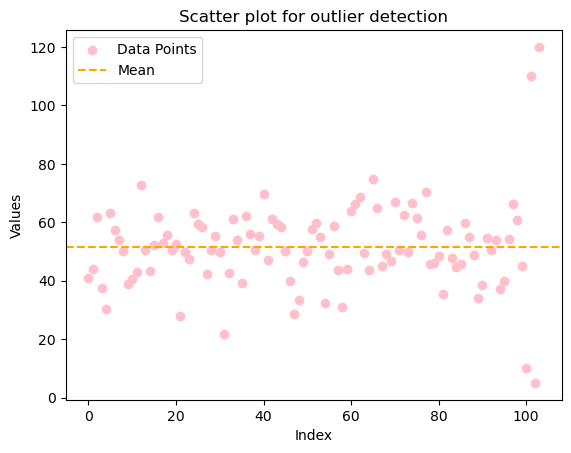

In [5]:
#Scatter plot for outlier detection

plt.scatter(range(len(df)),df['Values'],color='pink',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='orange',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outlier detection")
plt.legend()
plt.show()

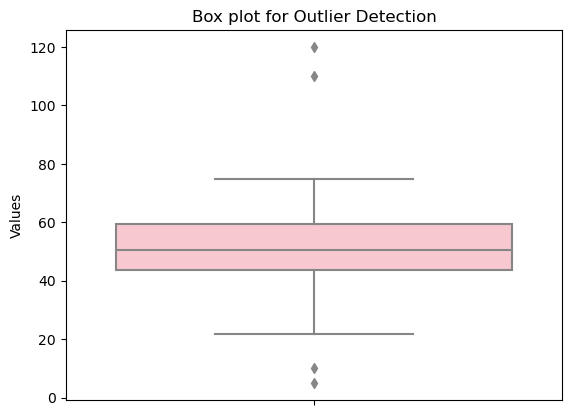

In [6]:
# Boxplot for outlier detection

sns.boxplot(data=df, y='Values',color='pink')
plt.title("Box plot for Outlier Detection")
plt.show()

#

**Using zscore to identify outliers**

z - score formula:
    z= x-mean /std 
    where x=data point
    
Steps:
    1. Compute the z-score for each data point
    2. if Z-Score > 3 or Z-Score < -3, mark it as an outlier

In [7]:
df['Z-Score']= zscore(df['Values'])
df['Outlier_z']=df['Z-Score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_z']=='Outlier'])


     Values   Z-Score Outlier_z
101   110.0  3.910718   Outlier
102     5.0 -3.095824   Outlier
103   120.0  4.578008   Outlier


#

**Interquartile Range (IQR) Method**

The IQR formula is:

IQR = Q3 - Q1

Steps:
  1. Calculate Q1(25th percentile) and Q3 (75th percentile)
  2. Compute IQR = Q3-Q1
  3. Define lower and upper bounds
  
      -> Lower Bound= Q1 - 1.5 * IQR
      -> Upper Bond= Q3 + 1.5 * IQR
  4. Any values outside these bounds is an outlier    

In [8]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if ( x< lower_bound or x > upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

     Values   Z-Score Outlier_z Outlier_IQR
100    10.0 -2.762179    Normal     Outlier
101   110.0  3.910718   Outlier     Outlier
102     5.0 -3.095824   Outlier     Outlier
103   120.0  4.578008   Outlier     Outlier


#

**Finding summary**

1)scatter plot - Outliers appear far from the main cluster

2)Box plot - Outliers are outside the whiskers

3)Z-score - values with Z>3 or Z<-3 are outliers

4)IQR method - values outside [Q1-1.5IQR Q3+1.5IQR] are outliers

**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 

#

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [9]:
np.random.seed(50)
data=np.random.normal(loc=50,scale=10,size=100)#mean=50 std=10
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [10]:
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
minv=np.min(data)
maxv=np.max(data)

In [11]:
IQR=Q3-Q1
LB=Q1 - 1.5 *IQR
UB=Q3 + 1.5 *IQR

In [12]:
outliers=data[(data < LB) | (data >UB)]

In [13]:
print(f"5-Number Summary:\nMin:{minv},Q1:{Q1},Median(Q2):{Q2},Q3:{Q3},Max:{maxv}")

5-Number Summary:
Min:5.0,Q1:44.07803292222455,Median(Q2):50.45256847180777,Q3:57.43920774263691,Max:120.0


In [14]:
print(f"IQR:{IQR}")

IQR:13.361174820412359


In [15]:
print(f"Lower bound:{LB},Upper Bound:{UB}")

Lower bound:24.036270691606013,Upper Bound:77.48096997325544


# 

#

#

# SAMPLING

In [16]:
print(f"Outliers:{outliers}")

Outliers:[ 83.14075346  11.90109622  10.         110.           5.
 120.        ]


**Balancing a Dataset with Downsampling**

Imagine we have a dataset for a binary classification task where the class labels are balanced, and we want to downsample the majority class to balance the dataset

In [17]:
import pandas as pd
from sklearn.utils import  resample
df= pd.DataFrame({
    'Age' : [22,25,27,28,30,35,40,45,50,55,60,65,70],
    'Income':[2200,2500,2700,3200,3500,3800,4000,4200,4300,4500,5000,5500,6000],
    'Class':['High','Low','Low','High','High','Low','High','High','Low','Low','High','High','Low']
    })

High class has 7 instances

Low class has 6 instances

In [18]:
#Separate majority and minority classes

df_high = df[df['Class']=='High']
df_low= df[df['Class']=='Low']
df_high

,Age,Income,Class
0,22,2200,High
3,28,3200,High
4,30,3500,High
6,40,4000,High
7,45,4200,High
10,60,5000,High
11,65,5500,High


In [19]:
df_low

,Age,Income,Class
1,25,2500,Low
2,27,2700,Low
5,35,3800,Low
8,50,4300,Low
9,55,4500,Low
12,70,6000,Low


In [20]:
# Downsample majority class

df_high_downsampled=resample(df_high, replace=False, n_samples=len(df_low),random_state=42)

In [21]:
# Combine downsampled majority with minority class

df_balanced=pd.concat([df_high_downsampled,df_low])

In [22]:
print(df_balanced['Class'].value_counts())

Class
High    6
Low     6
Name: count, dtype: int64


In [23]:
# Upsampling the Minority Class

df_low_upsampled = resample(df_low, replace=True, n_samples=len(df_high), random_state=42)

In [24]:
# Combine upsampled majority with minority class

df_balanced_upsampled = pd.concat([df_high, df_low_upsampled])

In [25]:
print(df_balanced_upsampled['Class'].value_counts())

Class
High    7
Low     7
Name: count, dtype: int64


# SMOTE (Synthetic Minority Over-Sampling Technique) to balance the dataset. SMOTE generates synthetic examples rather than simply duplicating existing ones.


#

In [1]:
pip uninstall scikit-learn imbalanced-learn -y

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Note: you may need to restart the kernel to use updated packages.


**Steps for SMOTE**

1.SMOTE to generate synthetic samples instead of duplicating existing ones.



2.Convert categorical class labels into numeric form for SMOTE to work



3.Apply SMOTE to balance the dataset



4.Convert back to original categorical labels.



5.Combine the resampled data into a final balanced dataset


In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [14]:
# Original dataset

df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500],
    'Class': ['Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Minority', 'Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Majority']
})

In [15]:
# 1. Convert categorical labels to numeric

df['Class'] = df['Class'].map({'Majority': 0, 'Minority': 1})

In [16]:
# 2. Separate features (X) and target (y)

X = df[['Age', 'Income']]  # Features
y = df['Class']  # Target variable

In [17]:
# 3. Apply SMOTE to generate synthetic samples for the minority class

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)  # Adjusted k_neighbors to 2
X_resampled, y_resampled = smote.fit_resample(X, y)

In [18]:
# 4. Convert numeric labels back to categorical

y_resampled = y_resampled.map({0: 'Majority', 1: 'Minority'})

In [19]:
# 5. Combine the resampled dataset

df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=['Age', 'Income']), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

In [20]:
# 6. Print class distribution

print(df_balanced['Class'].value_counts())

Class
Minority    9
Majority    9
Name: count, dtype: int64


In [21]:
# 7. Display the upsampled dataset

print(df_balanced)

    Age  Income     Class
0    22    2000  Minority
1    25    2500  Majority
2    27    2700  Majority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Minority
7    45    4200  Majority
8    50    4300  Majority
9    55    4500  Majority
10   60    5000  Majority
11   70    5500  Majority
12   32    3519  Minority
13   39    3988  Minority
14   39    3973  Minority
15   36    3879  Minority
16   36    3858  Minority
17   22    2041  Minority
